<a href="https://colab.research.google.com/github/nguynlb/DataScience/blob/main/recognitionhandnumber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recognition Handler Number
## 1. Import Dataset

In [3]:
%pwd

'/content'

In [4]:
%ls

sample_data/


In [5]:
import tensorflow as tf

In [6]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
train_labels.shape

(60000,)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline


2

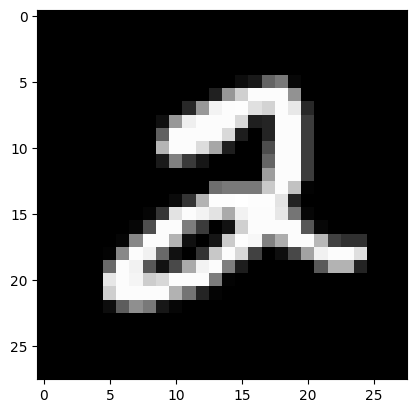

In [10]:
plt.imshow(train_images[5], cmap="gray");
train_labels[5]

In [11]:
import random as rd
rd.randint(3,10)

3

<Axes: >

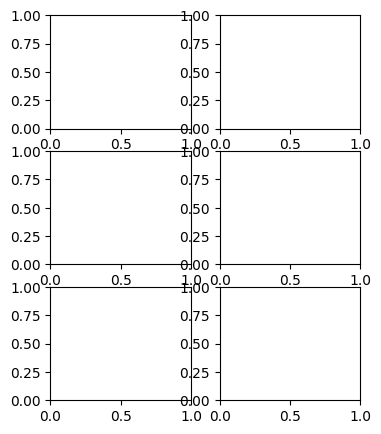

In [12]:
fig, axes = plt.subplots(3,2, figsize=(4,5))
axes[1][1]

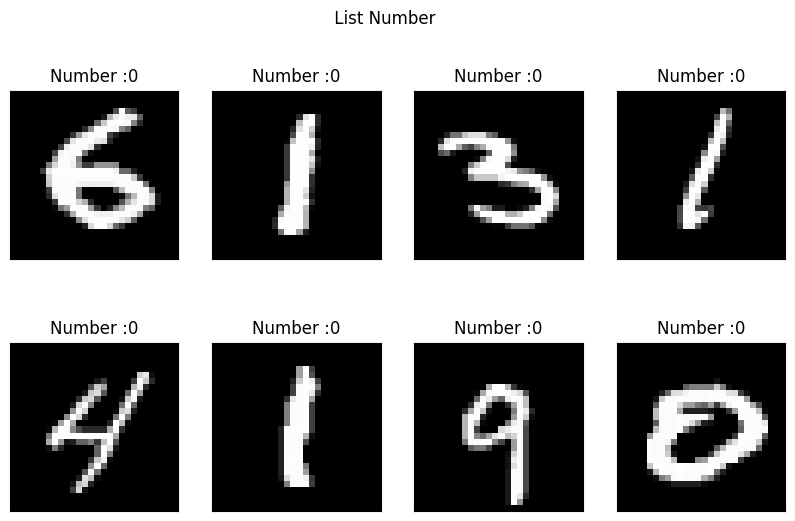

In [13]:
nrow = 2
ncol = 4
size_list_image = train_images.shape[0]
fig, axes = plt.subplots(nrow, ncol, figsize=(10, 6))
for img in range(nrow * ncol):
  rand_image = rd.randint(0, size_list_image)

  ax = axes[img // ncol][img % ncol]
  ax.imshow(train_images[rand_image], cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f"Number :{train_labels[rand_image].argmax()}")
  
fig.suptitle(" List Number ")
fig.show()

In [14]:
test_images.shape

(10000, 28, 28)

## 2. Preprocessing Data

In [15]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [16]:
train_images = train_images.astype("float") / 255.0
test_images = test_images.astype("float") / 255.0

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images.shape

(60000, 28, 28, 1)

In [17]:
from sklearn.preprocessing import LabelBinarizer

In [18]:
lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
test_labels = lb.fit_transform(test_labels)

## 3. Create model

Create model get ideals from VGG

In [19]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(32, (3,3), padding='same', input_shape=(28, 28, 1)))
model.add(Activation("relu"))

In [22]:
model.add(BatchNormalization())

In [23]:
model.add(Conv2D(32, (3,3), padding='same'))

In [24]:
model.add(Activation('relu'))

In [25]:
model.add(BatchNormalization())

In [26]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [27]:
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))

In [28]:
model.add(BatchNormalization())

In [29]:
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))

In [30]:
model.add(BatchNormalization())

In [31]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [32]:
model.add(Flatten())

In [33]:
model.add(Dense(512, activation='relu'))

In [34]:
model.add(Dense(10, activation='softmax'))

In [35]:
model.input_shape

(None, 28, 28, 1)

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                        

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [38]:
aug = ImageDataGenerator(rotation_range=0.19, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.1, horizontal_flip=True)

In [39]:
# Epoch - Step
epoch = 10
# Batch per step
batch_size = 64
learning_rate = 0.01

In [40]:
opt = SGD(learning_rate=learning_rate, momentum=0.9)

In [41]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])

In [42]:
model.fit_generator(aug.flow(train_images, train_labels, batch_size=batch_size), steps_per_epoch=train_images.shape[0]//batch_size, epochs=epoch)

Epoch 1/10


<ipython-input-42-9cca20f58fee>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(aug.flow(train_images, train_labels, batch_size=batch_size), steps_per_epoch=train_images.shape[0]//batch_size, epochs=epoch)


937/937 [==============================] - 33s 24ms/step - loss: 0.3587 - acc: 0.8839
Epoch 2/10
937/937 [==============================] - 22s 24ms/step - loss: 0.1270 - acc: 0.9603
Epoch 3/10
937/937 [==============================] - 22s 24ms/step - loss: 0.1006 - acc: 0.9695
Epoch 4/10
937/937 [==============================] - 23s 25ms/step - loss: 0.0841 - acc: 0.9743
Epoch 5/10
937/937 [==============================] - 21s 22ms/step - loss: 0.0758 - acc: 0.9767
Epoch 6/10
937/937 [==============================] - 22s 23ms/step - loss: 0.0677 - acc: 0.9796
Epoch 7/10
937/937 [==============================] - 21s 22ms/step - loss: 0.0646 - acc: 0.9801
Epoch 8/10
937/937 [==============================] - 22s 23ms/step - loss: 0.0597 - acc: 0.9815
Epoch 9/10
937/937 [==============================] - 22s 23ms/step - loss: 0.0573 - acc: 0.9828
Epoch 10/10
937/937 [==============================] - 21s 23ms/step - loss: 0.0535 - acc: 0.9833


In [43]:
model.save('LongBao.h5')

In [44]:
save_model = tf.keras.models.load_model('LongBao.h5')

In [54]:
result = save_model.predict(test_images[1:2])
result.argmax()

1/1 [==============================] - 0s 33ms/step


2

Text(0.5, 1.0, 'Predict: 2')

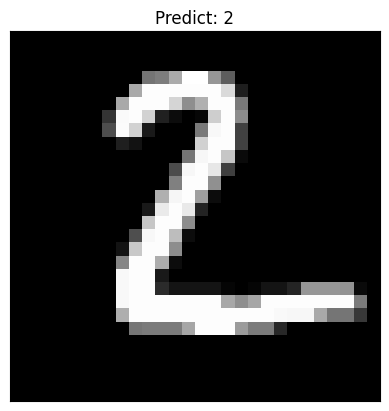

In [66]:
plt.imshow(test_images[1], cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title(f"Predict: {result.argmax()}")